In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scienceplots

In [86]:
class DATA():
    def __init__(self):
        self.time = 0
        self.event = 0
        
def getData(det, file):
    df = pd.read_csv(file, delimiter=',', header=None, comment='#')
    df = df.set_axis(['event','time'], axis = 1)
    det.event = df['event'].to_numpy(dtype=float)
    det.time = df['time'].to_numpy(dtype=float)
    #print(df)

In [96]:
PDS = DATA()
CRP = DATA()

getData(PDS, "PDS_TriggerTimes.txt")
getData(CRP, "CRP4_Run20677_Timestamps.txt")

CRP.event[True] = 0.5
PDS.event[True] = 0.5

In [233]:
initialtime = 0
maxtime = 600
if maxtime == 0:
    maxtime = int(np.nanmax(CRP.time))
binsmult = 10
H = [0]*3
yedges = [0]*3
xedges = [0]*3
H[0], yedges[0], xedges[0] = np.histogram2d(PDS.event, PDS.time, bins=(1,(maxtime-initialtime)*binsmult), range = [[0,1],[initialtime,maxtime]])
H[1], yedges[1], xedges[1] = np.histogram2d(CRP.event, CRP.time, bins=(1,(maxtime-initialtime)*binsmult), range = [[0,1],[initialtime,maxtime]])
H[2], yedges[2], xedges[2] = np.histogram2d(CRP.event, CRP.time, bins=(1,(maxtime-initialtime)*binsmult), range = [[0,1],[initialtime,maxtime]])

h0i = H[0].astype(int)
h1i = H[1].astype(int)

H[2] = (np.bitwise_and(h0i,h1i)).astype(float)
for i in range(3):
    print(f'{i} {np.count_nonzero(H[i])}')
print(f'{np.count_nonzero(H[2])/np.count_nonzero(H[1])}')
H[0][H[0]==0] = np.nan
H[1][H[1]==0] = np.nan

#H[2][H[2]>=2] = 1
#print(np.sum(H[2]))
H[2][H[2]==0] = np.nan


0 1365
1 1363
2 1344
0.9860601614086574


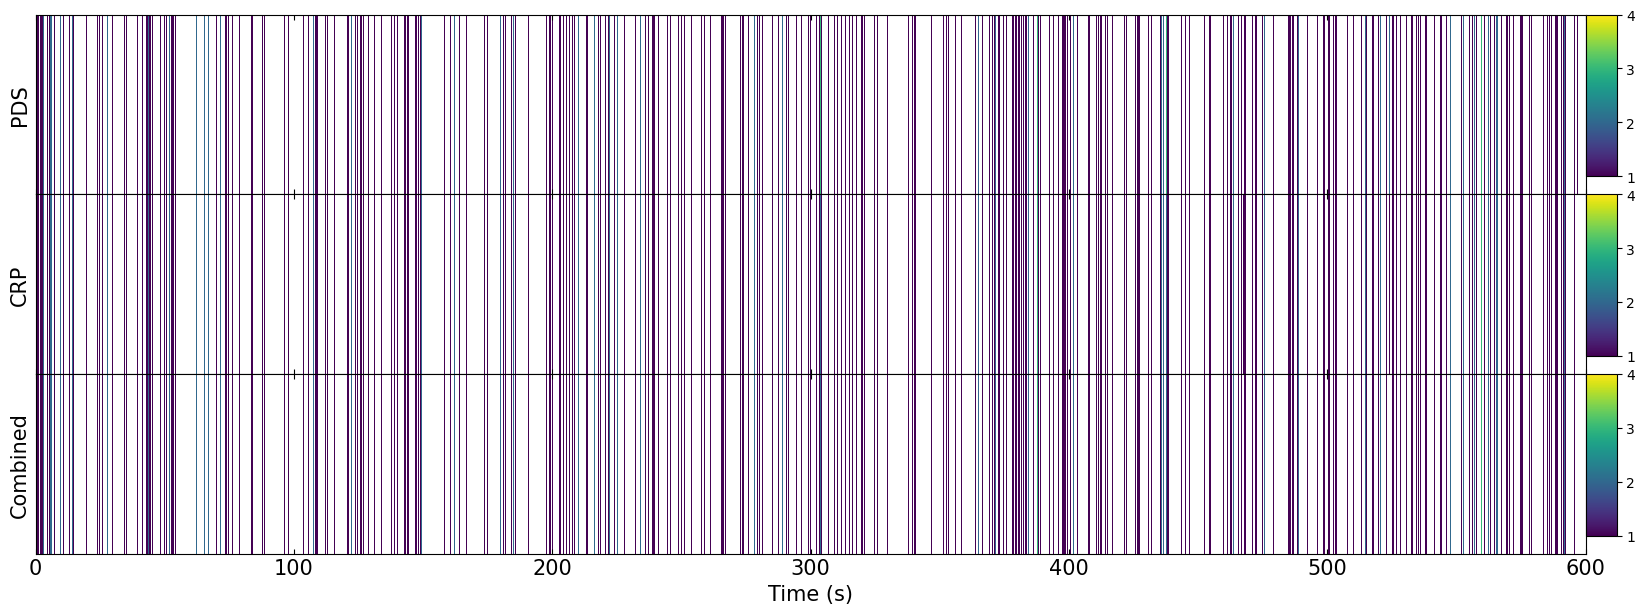

In [234]:
#plt.style.use(['science', 'notebook'])
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(20,7))
fig.subplots_adjust(hspace=0)

descript = ["PDS", "CRP", "Combined"]
for i, ax in enumerate(axs):
    X, Y = np.meshgrid(xedges[i], yedges[i])
    pcm = ax.pcolormesh(X, Y, H[i])
    ax.tick_params(left=False, right=False, top=True, direction='in', labelleft=False, labelsize=15)
    ax.set_ylabel(descript[i], fontsize=15)
    axs[2].set_xlabel("Time (s)", fontsize=15)
    cax = ax.inset_axes([1.0,0.1,0.02,0.9])
    plt.colorbar(pcm, ax = ax, cax = cax)
    a = 0
    #plt.xlim(20,24)

plt.savefig("time_display.png", bbox_inches='tight')

In [44]:
arrayidx = np.where((X[0]>0) & (X[0]<130))
print(np.nansum(H[2][0][arrayidx[0][0]:arrayidx[0][-1]]))

65.0
